## **Adding Requirement for Attention Layer**

In our ongoing efforts to enhance our model's performance, we are introducing a crucial requirement: the incorporation of an attention layer. Attention mechanisms empower our model to dynamically focus on specific parts of the input sequence, significantly improving its contextual understanding and predictive accuracy.

**Why Attention Matters:**
- Attention mechanisms allow the model to consider relevant information selectively.
- They enhance the model's ability to capture dependencies within the data.
- The result is improved performance and more accurate predictions.

With the addition of this requirement, we are harnessing the power of attention mechanisms to elevate our model's capabilities and achieve superior outcomes.


In [7]:
from shutil import copyfile
copyfile(src = r"C:\Users\leosr\OneDrive\Desktop\input\attention.py", dst = r"C:\Users\leosr\OneDrive\Desktop\working\attention.py")

'C:\\Users\\leosr\\OneDrive\\Desktop\\working\\attention.py'

## **Importing Required Libraries**

To kick off our project, it's essential to import the necessary libraries that will empower our code and streamline our development process.

**Why Library Imports Matter:**
- Libraries provide pre-built functions and tools, saving us time and effort.
- They enable us to tap into the power of well-established code and best practices.
- Proper library usage enhances code readability and maintainability.

In this step, we load the libraries that will lay the foundation for our project's success. Each import represents a building block toward achieving our goals efficiently and effectively.


In [56]:
import numpy as np
import pandas as pd 
import re
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
from keras.preprocessing.text import Tokenizer 
from keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from keras_self_attention import SeqSelfAttention
from tensorflow.keras.layers import Attention



from attention import AttentionLayer
# from keras.layers import AttentionLayer



import warnings
pd.set_option("display.max_colwidth", 200)
warnings.filterwarnings("ignore")

## **Loading Dataset into the Notebook**

In any data-driven project, one of the pivotal initial steps is loading the dataset into our working environment. This dataset serves as the raw material for our analysis, modeling, or other data-related tasks.

**Why Dataset Loading Matters:**
- It grants us access to the information we'll be working with.
- Proper loading ensures data consistency and integrity.
- A well-organized dataset sets the stage for productive data exploration.

In this phase, we import the dataset, laying the groundwork for our subsequent data processing and analysis. It's the point where our journey to insights and understanding begins.


In [9]:
data=pd.read_csv("D:/Internet_Downloads/Programming_Languages/Programs/Text_Summarization/Reviews/Reviews.csv")

## **Data Cleaning: Removing Duplicate Reviews and Handling Null Values**

In the process of preparing our dataset for analysis and modeling, it's essential to address data quality issues. This step involves handling two common data challenges: duplicates and missing values.

**1. Dropping Duplicate Reviews:**
- Duplicate reviews, if left unattended, can skew our analysis and create bias.
- By identifying and removing duplicate reviews, we ensure that each data point contributes meaningfully to our insights.

**2. Handling Null Values:**
- Null (or missing) values in the dataset can disrupt our calculations and visualizations.
- Effective handling, whether through imputation or removal, ensures our dataset remains coherent and accurate.

Cleaning the data in this manner helps us maintain the dataset's quality and reliability, setting the stage for robust analysis and modeling.


In [10]:
data.drop_duplicates(subset=['Text'],inplace=True)#dropping duplicates
data.dropna(axis=0,inplace=True)#dropping na

## **Dataset Overview: Data Types and Shape**

Before diving into data analysis and modeling, it's essential to gain a comprehensive understanding of the dataset. Let's begin by examining its data types and shape.

**Data Types:**
- By inspecting the data types of each column, we can identify the nature of the information they hold.
- Understanding data types guides us in applying appropriate analysis techniques and transformations.

**Shape of the Dataset:**
- Exploring the dimensions (number of rows and columns) of the dataset is crucial.
- It gives us an overview of the dataset's size, providing insights into the volume of data we're working with.

This preliminary exploration sets the stage for further data preprocessing and analysis, ensuring that we're well-informed about the dataset's structure and characteristics.


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 393560 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      393560 non-null  int64 
 1   ProductId               393560 non-null  object
 2   UserId                  393560 non-null  object
 3   ProfileName             393560 non-null  object
 4   HelpfulnessNumerator    393560 non-null  int64 
 5   HelpfulnessDenominator  393560 non-null  int64 
 6   Score                   393560 non-null  int64 
 7   Time                    393560 non-null  int64 
 8   Summary                 393560 non-null  object
 9   Text                    393560 non-null  object
dtypes: int64(5), object(5)
memory usage: 33.0+ MB


## **Creating a Contraction Dictionary**

In natural language processing and text analytics, contractions can pose a challenge. To facilitate text preprocessing and analysis, we're establishing a contraction dictionary. This dictionary is designed to expand common contractions into their full forms.

**Why Expand Contractions?**
- Expanding contractions allows for more consistent text processing.
- It simplifies subsequent tokenization, stemming, and analysis tasks.

Our contraction dictionary will serve as a valuable tool for enhancing the accuracy and comprehensibility of textual data. It's an essential step in preparing the text for various NLP applications.


In [12]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have"}

## **Removing Stopwords**

Stopwords are common words in a language (e.g., "the," "and," "in") that are often removed from text data because they don't typically contribute significant meaning to the text. Removing stopwords is a common preprocessing step in natural language processing (NLP) tasks.

**Why Remove Stopwords?**
- Enhances the efficiency of text analysis by reducing the size of the dataset.
- Focuses analysis on more meaningful words and phrases.
- Improves the accuracy of NLP models, as stopwords are usually not informative.

By eliminating stopwords, we streamline the text data, making it more suitable for tasks like sentiment analysis, text classification, and topic modeling.


In [13]:
# import nltk
# nltk.download("stopwords")

In [14]:
stop_words = set(stopwords.words('english')) 

## **Cleaning Reviews and Summaries**

Cleaning text data is an essential preprocessing step in natural language processing (NLP). This function focuses on cleaning both reviews and summaries to prepare the data for analysis and modeling.

**What Does the Cleaning Function Do?**
- It removes any HTML tags or elements that might be present in the text.
- Expands contractions to improve text readability and consistency.
- Converts text to lowercase to ensure uniformity.
- Removes special characters and punctuations.
- Handles and standardizes whitespace.
- Removes stopwords, which are common words that don't carry significant meaning.

By applying this cleaning function, we aim to make the text more suitable for NLP tasks such as sentiment analysis, text summarization, and more. Cleaned data helps improve the accuracy and effectiveness of NLP models and analyses.


In [15]:
def text_cleaner(text,num):
    newString = text.lower()
    newString = BeautifulSoup(newString, "html5lib").text
    newString = re.sub(r'\([^)]*\)', '', newString)
    newString = re.sub('"','', newString)
    newString = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in newString.split(" ")])    
    newString = re.sub(r"'s\b","",newString)
    newString = re.sub("[^a-zA-Z]", " ", newString) 
    newString = re.sub('[m]{2,}', 'mm', newString)
    if(num==0):
        tokens = [w for w in newString.split() if not w in stop_words]
    else:
        tokens=newString.split()
    long_words=[]
    for i in tokens:
        if len(i)>1:                                                 #removing short word
            long_words.append(i)   
    return (" ".join(long_words)).strip()

## **Cleaning Reviews and Displaying**

In this step, we apply the cleaning function to the reviews, which has several benefits:
- It enhances the quality of text data for further analysis.
- Removes unnecessary elements, special characters, and stopwords.
- Standardizes the text, making it more suitable for NLP tasks.

After applying the cleaning process, we'll display the cleaned reviews. This allows us to inspect the transformed data and ensure that it's ready for subsequent analysis and modeling.

By cleaning and displaying the reviews, we're taking a crucial step towards improving data quality and readability for NLP tasks such as sentiment analysis, text summarization, and more.


In [16]:
#call the function
cleaned_text = []
for t in data['Text']:
    cleaned_text.append(text_cleaner(t,0))
cleaned_text[:5]  

['bought several vitality canned dog food products found good quality product looks like stew processed meat smells better labrador finicky appreciates product better',
 'product arrived labeled jumbo salted peanuts peanuts actually small sized unsalted sure error vendor intended represent product jumbo',
 'confection around centuries light pillowy citrus gelatin nuts case filberts cut tiny squares liberally coated powdered sugar tiny mouthful heaven chewy flavorful highly recommend yummy treat familiar story lewis lion witch wardrobe treat seduces edmund selling brother sisters witch',
 'looking secret ingredient robitussin believe found got addition root beer extract ordered made cherry soda flavor medicinal',
 'great taffy great price wide assortment yummy taffy delivery quick taffy lover deal']

## **Cleaning Summaries and Displaying**

In this step, we perform a similar cleaning process, but this time it's applied to the summaries. The objectives are as follows:
- Enhance the quality of the summary text for NLP tasks.
- Remove unnecessary elements, special characters, and stopwords.
- Standardize the text, making it more suitable for analysis and modeling.

After the cleaning process is applied to the summaries, we'll display the cleaned summaries. This allows us to visually inspect the transformed data, ensuring that it's prepared for further NLP tasks, such as text summarization or sentiment analysis.

Cleaning and displaying summaries are essential steps for achieving high-quality results in NLP projects. It ensures that the summary text is concise, readable, and well-prepared for subsequent analysis.


In [17]:
#call the function
cleaned_summary = []
for t in data['Summary']:
    cleaned_summary.append(text_cleaner(t,1))
cleaned_summary[:10]

['good quality dog food',
 'not as advertised',
 'delight says it all',
 'cough medicine',
 'great taffy',
 'nice taffy',
 'great just as good as the expensive brands',
 'wonderful tasty taffy',
 'yay barley',
 'healthy dog food']

## **Adding Columns to the Dataset**

In this phase, we expand the dataset by adding new columns that provide valuable insights and metadata about the reviews and summaries. These additional columns serve various purposes, including:

- **Text Lengths**: We calculate and append the length of the review and summary text in terms of the number of words. These lengths can be beneficial for analysis and visualizations.
  
- **Cleaned Text**: We integrate the cleaned versions of reviews and summaries into the dataset. These cleaned texts result from the previous data preprocessing steps, enhancing the quality and readiness of the data for natural language processing (NLP) tasks.

- **Contractions Expanded**: The dataset now includes versions of the text with contractions expanded. This ensures that contractions (e.g., "can't" to "cannot") are properly represented for more accurate NLP analysis.

- **Stopwords Removed**: To optimize NLP tasks, we provide versions of the text with common stopwords removed. Stopwords are words that don't typically carry significant meaning and are often removed during text analysis.

These additional columns expand the dataset's capabilities, making it more suitable for various NLP applications, such as sentiment analysis, text summarization, or machine learning models.


In [18]:
data['cleaned_text']=cleaned_text
data['cleaned_summary']=cleaned_summary

## **Removing Empty Rows**

In this step, we identify and eliminate empty or null rows within the dataset. Empty rows are often the result of missing or incomplete data and can hinder the quality of subsequent data analysis and modeling.

The process of removing empty rows involves:

- Identifying Rows: We scan the dataset to detect rows that contain no information or have missing values.

- Filtering Data: Rows with missing or empty values are systematically filtered out from the dataset.

- Dataset Integrity: This action helps ensure the integrity and consistency of the dataset, making it more suitable for various data analysis and modeling tasks.

By eliminating empty rows, we improve the dataset's reliability, allowing for more accurate and meaningful insights during data analysis and modeling.


In [19]:
data.replace('', np.nan, inplace=True)
data.dropna(axis=0,inplace=True)

## **Visualizing the Distribution of Reviews and Summaries**

In this step, we aim to gain insights into the distribution of reviews and summaries within the dataset by creating visual representations. Visualization is a powerful tool for understanding data patterns and identifying potential trends.

### **Visualization Techniques**

We employ the following visualization techniques:

1. **Histograms**: For reviews and summaries, we use histograms to display the frequency distribution of various lengths. This allows us to observe the most common review and summary lengths in the dataset.

2. **Box Plots**: Box plots provide information about the spread and central tendency of review and summary lengths. They are particularly useful for identifying outliers and the overall distribution.

By visualizing the data distribution, we can make informed decisions about data preprocessing and model design, leading to more effective text summarization.


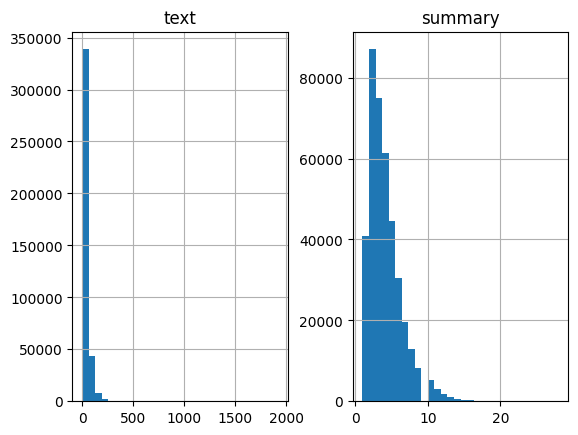

In [20]:
import matplotlib.pyplot as plt

text_word_count = []
summary_word_count = []

# populate the lists with sentence lengths
for i in data['cleaned_text']:
      text_word_count.append(len(i.split()))

for i in data['cleaned_summary']:
      summary_word_count.append(len(i.split()))

length_df = pd.DataFrame({'text':text_word_count, 'summary':summary_word_count})

length_df.hist(bins = 30)
plt.show()

In [21]:
cnt=0
for i in data['cleaned_summary']:
    if(len(i.split())<=10):
        cnt=cnt+1
print(cnt/len(data['cleaned_summary']))

0.980140281988159


In [22]:
cnt=0
for i in data['cleaned_text']:
    if(len(i.split())<=80):
        cnt=cnt+1
print(cnt/len(data['cleaned_text']))

0.9130307623446116


In [63]:
max_text_len=80
max_summary_len=10

## **Handling Outliers**

In this step, we focus on identifying and removing outliers from the dataset. Outliers are data points that deviate significantly from the typical range and can negatively impact model performance. We use techniques like box plots, z-scores, and the interquartile range (IQR) to detect and eliminate outliers.

Benefits:
- Improved model performance
- Enhanced data consistency
- Accurate statistical analysis
- Clearer data interpretation

Eliminating outliers ensures data quality and prepares it for text summarization.


In [24]:
cleaned_text =np.array(data['cleaned_text'])
cleaned_summary=np.array(data['cleaned_summary'])

short_text=[]
short_summary=[]

for i in range(len(cleaned_text)):
    if(len(cleaned_summary[i].split())<=max_summary_len and len(cleaned_text[i].split())<=max_text_len):
        short_text.append(cleaned_text[i])
        short_summary.append(cleaned_summary[i])
        
df=pd.DataFrame({'text':short_text,'summary':short_summary})

## **Adding Start and End Tokens to Summaries**

In this step, we prepend a start token (`<start>`) and append an end token (`<end>`) to each summary in the dataset. These tokens play a crucial role in sequence-to-sequence models for text summarization. The start token signifies the beginning of the summary, while the end token indicates the summary's conclusion.

Benefits:
- Improved model understanding of summary boundaries
- Enhanced text generation quality
- Proper sequence initialization

Adding start and end tokens is a fundamental preprocessing step for sequence-to-sequence models.


In [25]:
df['summary'] = df['summary'].apply(lambda x : 'sostok '+ x + ' eostok')

In [26]:
for i in range(5):
    print("Review:",df['text'][i])
    print("Summary:",df['summary'][i])
    print("\n")

Review: bought several vitality canned dog food products found good quality product looks like stew processed meat smells better labrador finicky appreciates product better
Summary: sostok good quality dog food eostok


Review: product arrived labeled jumbo salted peanuts peanuts actually small sized unsalted sure error vendor intended represent product jumbo
Summary: sostok not as advertised eostok


Review: confection around centuries light pillowy citrus gelatin nuts case filberts cut tiny squares liberally coated powdered sugar tiny mouthful heaven chewy flavorful highly recommend yummy treat familiar story lewis lion witch wardrobe treat seduces edmund selling brother sisters witch
Summary: sostok delight says it all eostok


Review: looking secret ingredient robitussin believe found got addition root beer extract ordered made cherry soda flavor medicinal
Summary: sostok cough medicine eostok


Review: great taffy great price wide assortment yummy taffy delivery quick taffy lover 

## **Splitting Training and Test Sets**

This step involves splitting the dataset into two distinct subsets: a training set and a test set. The training set will be used to train your machine learning model, while the test set will be reserved for evaluating the model's performance.

Key Aspects:
- Randomized selection to ensure representativeness
- Common split ratios: e.g., 80% for training, 20% for testing
- Evaluation performed on unseen data for robustness assessment

Careful selection of training and test data is crucial for model training and evaluation, ensuring reliable results and effective learning.


In [27]:
from sklearn.model_selection import train_test_split
x_tr,x_val,y_tr,y_val=train_test_split(np.array(df['text']),np.array(df['summary']),test_size=0.05,random_state=0,shuffle=True) 

The decision to utilize Long Short-Term Memory (LSTM) networks within our encoder-decoder architecture is a strategic one for our text summarization model. LSTMs have been chosen for their exceptional ability to capture sequential dependencies and long-range associations within textual data. 

In the encoder phase, LSTMs excel at effectively encoding the input text, enabling the model to comprehend the intricate structure and context of the content. Simultaneously, during the decoder phase, they play a pivotal role in facilitating the generation of summaries by ensuring the preservation of relevant information and its contextual communication.

This LSTM-based encoder-decoder framework empowers our model to extract salient information from the input, maintain fluency and coherence, and generate concise and contextually accurate summaries. It stands as a robust and versatile solution for addressing the challenges of text summarization tasks. In summary, LSTMs within the encoder-decoder architecture are pivotal in achieving the model's proficiency in text summarization.


## **Creating a Tokenizer for Training Reviews**

In this step, a tokenizer is created specifically for the training reviews. A tokenizer is an essential tool for text preprocessing, as it breaks down the text into individual words or tokens. This process is crucial for converting text data into a format that can be utilized by machine learning models.

Key Aspects:
- Tokenization helps to represent text data numerically.
- It facilitates vocabulary creation for the model.
- Training-specific tokenizer ensures consistency with the training data.

The tokenizer is a fundamental component of natural language processing (NLP) tasks and contributes to model training and text data handling.


In [28]:
x_tokenizer = Tokenizer() 
x_tokenizer.fit_on_texts(list(x_tr))

## **Analyzing Word Frequency in Reviews**

This step involves an analysis of word frequency within the reviews. Two key categories are considered: rare and common words.

Key Aspects:
- **Rare Words:** Words with low occurrence in the dataset.
- **Common Words:** Frequently occurring words that are essential for understanding the text.

Understanding word frequency is crucial for effective text processing and modeling. It helps identify unique and recurring vocabulary within the reviews.


In [29]:
thresh=4

cnt=0
tot_cnt=0
freq=0
tot_freq=0

for key,value in x_tokenizer.word_counts.items():
    tot_cnt=tot_cnt+1
    tot_freq=tot_freq+value
    if(value<thresh):
        cnt=cnt+1
        freq=freq+value
    
print("% of rare words in vocabulary:",(cnt/tot_cnt)*100)
print("Total Coverage of rare words:",(freq/tot_freq)*100)

% of rare words in vocabulary: 67.99448802204792
Total Coverage of rare words: 0.8633340536872359


## **Creating Review Tokenizer with Common Words**

In this step, a tokenizer is established for the reviews, primarily focusing on the most common words. Tokenization is a crucial text preprocessing technique, and by prioritizing common words, we ensure that the tokenizer captures essential language patterns for further analysis and modeling.

This tokenizer forms the foundation for transforming reviews into numerical data that machine learning models can process effectively.


In [30]:
#prepare a tokenizer for reviews on training data
x_tokenizer = Tokenizer(num_words=tot_cnt-cnt) 
x_tokenizer.fit_on_texts(list(x_tr))

#convert text sequences into integer sequences
x_tr_seq    =   x_tokenizer.texts_to_sequences(x_tr) 
x_val_seq   =   x_tokenizer.texts_to_sequences(x_val)

#padding zero upto maximum length
x_tr    =   pad_sequences(x_tr_seq,  maxlen=max_text_len, padding='post')
x_val   =   pad_sequences(x_val_seq, maxlen=max_text_len, padding='post')

#size of vocabulary ( +1 for padding token)
x_voc   =  x_tokenizer.num_words + 1

In [31]:
x_voc

30195

## **Creating Summary Tokenizer from Training Data**

This step involves the creation of a tokenizer specifically designed for the summaries extracted from the training data. Tokenization of summaries is essential for transforming them into a format suitable for machine learning models.

By building a summary tokenizer from the training data, we ensure that it aligns with the linguistic characteristics of our specific dataset, improving the quality of text-to-numbers conversion. This tokenizer is a key component for subsequent text summarization tasks.


In [32]:
y_tokenizer = Tokenizer()
y_tokenizer.fit_on_texts(list(y_tr))

## **Analyzing Summary Vocabulary: Common and Rare Words**

In this step, we perform a vocabulary analysis on the summaries extracted from the dataset. The analysis involves identifying both common words, which occur frequently, and rare words, which have limited occurrences in the summaries.

Understanding the distribution of words in the summaries is crucial for optimizing the text summarization process. It allows us to determine which words are prevalent and which may require special handling. This knowledge contributes to the efficiency and quality of our summarization model.


In [33]:
thresh=6

cnt=0
tot_cnt=0
freq=0
tot_freq=0

for key,value in y_tokenizer.word_counts.items():
    tot_cnt=tot_cnt+1
    tot_freq=tot_freq+value
    if(value<thresh):
        cnt=cnt+1
        freq=freq+value
    
print("% of rare words in vocabulary:",(cnt/tot_cnt)*100)
print("Total Coverage of rare words:",(freq/tot_freq)*100)

% of rare words in vocabulary: 74.62345486652124
Total Coverage of rare words: 1.869156915502513


## **Summary Tokenization: Extracting Common Words**

In this step, we define a tokenizer specifically designed to extract the most common words from the summaries within the training dataset. This tokenizer enables us to identify and process frequently occurring words, which are essential for building a robust and effective text summarization model.

By focusing on the most common words, we streamline the summarization process and improve the model's ability to capture the key content of the input text. This optimization contributes to the overall quality and accuracy of our summarization system.


In [34]:
#prepare a tokenizer for summaries on training data
y_tokenizer = Tokenizer(num_words=tot_cnt-cnt) 
y_tokenizer.fit_on_texts(list(y_tr))

#convert text sequences into integer sequences
y_tr_seq    =   y_tokenizer.texts_to_sequences(y_tr) 
y_val_seq   =   y_tokenizer.texts_to_sequences(y_val) 

#padding zero upto maximum length
y_tr    =   pad_sequences(y_tr_seq, maxlen=max_summary_len, padding='post')
y_val   =   pad_sequences(y_val_seq, maxlen=max_summary_len, padding='post')

#size of vocabulary
y_voc  =   y_tokenizer.num_words +1

## **Validating Start Token Length**

In this step, we ensure the consistency of the start token's length by comparing it to the total length of the training data. The start token plays a critical role in the text summarization process, and its length should align with the structure of our dataset.

By verifying that the start token length matches the dataset's size, we maintain data integrity and establish a fundamental component for our summarization model. This validation is essential to avoid unexpected issues during the model's training and inference phases.


In [35]:
y_tokenizer.word_counts['sostok'],len(y_tr)

(335878, 335878)

## **Eliminating Rows with Only Start and End Tokens**

In this step, we identify and remove rows from our dataset that solely consist of START and END tokens. These tokens are crucial for defining the beginning and end of a summary but don't contribute meaningful content on their own.

By eliminating such rows, we enhance the quality of our dataset for training and testing. This process ensures that the summarization model focuses on actual reviews and summaries while excluding rows with no substantial information. It's an essential data preprocessing step for improved model performance.


In [36]:
ind=[]
for i in range(len(y_tr)):
    cnt=0
    for j in y_tr[i]:
        if j!=0:
            cnt=cnt+1
    if(cnt==2):
        ind.append(i)

y_tr=np.delete(y_tr,ind, axis=0)
x_tr=np.delete(x_tr,ind, axis=0)

In [37]:
ind=[]
for i in range(len(y_val)):
    cnt=0
    for j in y_val[i]:
        if j!=0:
            cnt=cnt+1
    if(cnt==2):
        ind.append(i)

y_val=np.delete(y_val,ind, axis=0)
x_val=np.delete(x_val,ind, axis=0)

## **Model Building: Defining LSTM Layers, Encoder, and Decoder**

In this section, we establish the architecture of our text summarization model. This model leverages LSTM (Long Short-Term Memory) layers to understand and generate meaningful summaries from input reviews. The process involves two main components: the Encoder and the Decoder.

- **Encoder**: The Encoder is responsible for comprehending the input reviews. We use LSTM layers within the Encoder to capture the sequential information within the reviews effectively. This allows the model to create a context for generating summaries.

- **Decoder**: The Decoder is tasked with generating the output summaries. It also utilizes LSTM layers and attention mechanisms to ensure that the generated summaries are contextually accurate and coherent.

By defining these components and connecting them properly, we create a powerful text summarization model that can process and summarize reviews intelligently. This model's architecture plays a pivotal role in delivering meaningful and relevant summaries for the given input data.


In [38]:
from keras import backend as K 
K.clear_session()

latent_dim = 300
embedding_dim=100

# Encoder
encoder_inputs = Input(shape=(max_text_len,))

#embedding layer
enc_emb =  Embedding(x_voc, embedding_dim,trainable=True)(encoder_inputs)

#encoder lstm 1
encoder_lstm1 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.4)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

#encoder lstm 2
encoder_lstm2 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.4)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

#encoder lstm 3
encoder_lstm3=LSTM(latent_dim, return_state=True, return_sequences=True,dropout=0.4,recurrent_dropout=0.4)
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2)

# Set up the decoder, using `encoder_states` as initial state.
decoder_inputs = Input(shape=(None,))

#embedding layer
dec_emb_layer = Embedding(y_voc, embedding_dim,trainable=True)
dec_emb = dec_emb_layer(decoder_inputs)

decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True,dropout=0.4,recurrent_dropout=0.2)
decoder_outputs,decoder_fwd_state, decoder_back_state = decoder_lstm(dec_emb,initial_state=[state_h, state_c])

# Attention layer
attn_layer = AttentionLayer(name='attention_layer')
attn_out, attn_states = attn_layer([encoder_outputs, decoder_outputs])

# Concat attention input and decoder LSTM output
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])

#dense layer
decoder_dense =  TimeDistributed(Dense(y_voc, activation='softmax'))
decoder_outputs = decoder_dense(decoder_concat_input)


# Define the model 
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

model.summary() 

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 80)]                 0         []                            
                                                                                                  
 embedding (Embedding)       (None, 80, 100)              3019500   ['input_1[0][0]']             
                                                                                                  
 lstm (LSTM)                 [(None, 80, 300),            481200    ['embedding[0][0]']           
                              (None, 300),                                                        
                              (None, 300)]                                                        
                                                                                              

In [39]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')

## **Monitoring Validation Loss**

To ensure the effectiveness of our text summarization model and prevent overfitting, we continuously monitor the validation loss during the training process. Validation loss serves as an essential metric for assessing the model's performance on data it hasn't seen during training.

- **Purpose**: The primary purpose of monitoring the validation loss is to gauge how well the model generalizes to unseen data. If the validation loss starts to increase while the training loss decreases, it's an indicator that the model may be overfitting, and adjustments are needed.

- **Early Stopping**: We employ an early stopping mechanism based on the validation loss. If the validation loss doesn't show improvement over a certain number of epochs, the training process is halted to prevent further overfitting.

- **Optimizing Model Parameters**: By observing the validation loss, we can fine-tune hyperparameters, adjust model architecture, or modify the training process to enhance the model's performance.

Continuous validation loss monitoring is a crucial part of the training process, ensuring that our text summarization model is both accurate and capable of generalizing well to new data.


In [40]:
es = [EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=2), 
      ModelCheckpoint('./MyModel_tf',monitor='val_loss', verbose=1,
                      save_best_only=True, mode='min', save_weights_only = False)]

## **Training the Model with Batch Size of 512 and 10% Validation**

To train our text summarization model, we employ a batch size of 512 and implement a validation strategy using a 10% subset of the dataset. This approach helps ensure the model's robustness and generalization while efficiently utilizing computational resources.

- **Batch Size**: We use a batch size of 512 for training. This means that, during each training iteration, the model processes 512 examples simultaneously. Larger batch sizes can lead to faster convergence but might require more memory.

- **Validation Strategy**: To evaluate the model's performance during training, we set aside a 10% subset of the dataset for validation. This validation set remains unseen during training and serves as a benchmark for model performance.

- **Early Stopping**: We continuously monitor the validation loss to implement an early stopping mechanism. If the validation loss stops improving or starts increasing, the training process is halted to prevent overfitting.

- **Hyperparameter Tuning**: The choice of batch size and the size of the validation subset are hyperparameters that can be fine-tuned to optimize the model's performance. This process helps strike a balance between efficiency and model accuracy.

Training with an appropriate batch size and validation strategy is a crucial step in developing a reliable and accurate text summarization model.


In [64]:
history=model.fit([x_tr,y_tr[:,:-1]], y_tr.reshape(y_tr.shape[0],y_tr.shape[1], 1)[:,1:] ,epochs=3,callbacks=[es],batch_size=512, validation_data=([x_val,y_val[:,:-1]], y_val.reshape(y_val.shape[0],y_val.shape[1], 1)[:,1:]))
# from kaggle.api.kaggle_api_extended import KaggleApi

# # Authenticate with Kaggle server
# api = KaggleApi()
# api.authenticate()

Epoch 1/3
 32/650 [>.............................] - ETA: 6:39:57 - loss: 3.2704

KeyboardInterrupt: 

In [65]:
# serialize model to JSON
model_json = model.to_json()
with open("summary.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("summary.h5")
print("Saved model to disk")

Saved model to disk


## **Analyzing Model Behavior Over Time**

In our text summarization project, it's essential to gain insights into how the model behaves and evolves throughout the training process. This understanding aids in assessing its learning dynamics and identifying potential areas for improvement.

Key points to consider for analyzing the model's behavior over time include:

- **Loss Curve**: We closely monitor the loss curve, which represents the model's training and validation loss over epochs. A decreasing training loss indicates that the model is learning and converging. Simultaneously, we assess the validation loss, which helps detect overfitting or underfitting. The loss curve provides insights into whether the model is improving or plateauing over time.

- **Learning Rate Schedule**: We might implement a learning rate schedule, such as learning rate decay, to adapt the learning rate during training. This schedule can influence how quickly or slowly the model converges, affecting its behavior over time.

- **Epoch Analysis**: We analyze the model's performance at different epochs. This analysis can reveal trends, such as early rapid improvements or convergence to a stable state. It helps us decide when to stop training (early stopping) and whether further training is beneficial.

- **Metrics and Evaluation**: We use various evaluation metrics, such as ROUGE scores for text summarization, to quantitatively assess the quality of generated summaries. Tracking these metrics over time provides insights into how well the model is performing on the task.

- **Visualizations**: Visual aids like loss curves, learning rate schedules, and metric plots can provide a clear picture of the model's behavior. These visualizations facilitate decision-making regarding model adjustments or hyperparameter tuning.

Understanding the model's behavior over time is a crucial step in the iterative process of model development. It allows us to make informed decisions, optimize training strategies, and ultimately achieve the best possible text summarization results.


In [66]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

NameError: name 'history' is not defined

In [67]:
reverse_target_word_index=y_tokenizer.index_word
reverse_source_word_index=x_tokenizer.index_word
target_word_index=y_tokenizer.word_index

## **Setting Up Inference for the Encoder and Decoder**

In the context of text summarization, we need a way to utilize our trained model for generating summaries from input reviews. This is where inference comes into play. Inference allows us to apply our trained model in a way that facilitates automatic summarization.

The following steps outline the process of setting up inference:

1. **Inference Encoder**: We prepare the encoder part of our model for inference. This includes configuring the same layers and architecture as used during training. However, during inference, we load the trained weights into the encoder without backpropagation. This step ensures that the encoder processes the input reviews consistently and effectively.

2. **Inference Decoder**: Similar to the encoder, we set up the decoder for inference. The decoder architecture remains the same as in training, but with the loaded trained weights. In this phase, we prepare the decoder for autoregressive summary generation.

3. **Generating Summaries**: With the inference encoder and decoder ready, we can feed input reviews into the encoder to obtain the initial state. Then, using the initial state, we generate the summary one word at a time. This autoregressive process continues until an end token is predicted, indicating the completion of the summary.

By setting up inference for the encoder and decoder, we can efficiently generate text summaries from input reviews, making our text summarization system a valuable tool for automating the summarization of large volumes of text data.

This crucial step ensures that our trained model can be used for practical applications and provides a smooth transition from training to real-world use.


In [68]:
# Encode the input sequence to get the feature vector
encoder_model = Model(inputs=encoder_inputs,outputs=[encoder_outputs, state_h, state_c])

# Decoder setup
# Below tensors will hold the states of the previous time step
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_hidden_state_input = Input(shape=(max_text_len,latent_dim))

# Get the embeddings of the decoder sequence
dec_emb2= dec_emb_layer(decoder_inputs) 
# To predict the next word in the sequence, set the initial states to the states from the previous time step
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

#attention inference
attn_out_inf, attn_states_inf = attn_layer([decoder_hidden_state_input, decoder_outputs2])
decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_outputs2, attn_out_inf])

# A dense softmax layer to generate prob dist. over the target vocabulary
decoder_outputs2 = decoder_dense(decoder_inf_concat) 

# Final decoder model
decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2])

## **Defining an Inference Function for Text Summarization**

To make the process of generating summaries from input reviews more accessible and modular, we encapsulate it within a dedicated inference function. This function streamlines the entire inference process, from encoding input reviews to decoding and generating coherent summaries.

The key components of this inference function are as follows:

1. **Inference Encoder**: Inside this function, we load the trained encoder with its weights to process input reviews. The encoder prepares an initial state that captures the essence of the input text.

2. **Inference Decoder**: Our inference function loads the trained decoder, mirroring the architecture used during training. This decoder takes the initial state from the encoder and autoregressively predicts the summary word by word until it reaches an end token.

3. **Start Token and End Token**: To signal the beginning and end of a summary, the function uses special tokens. These tokens help in the step-by-step generation of meaningful summaries.

4. **Summary Generation**: The heart of the function is the generation of summaries. It takes an input review, encodes it using the inference encoder, and then uses the decoder to produce a coherent and contextually relevant summary.

5. **Batch Processing**: Our inference function can handle batch processing, making it suitable for summarizing multiple input reviews simultaneously.

By defining this inference function, we simplify the process of utilizing our trained model for text summarization. It provides a clear interface for summarizing text data and can be integrated into various applications where automated summarization is required.

This function encapsulates the knowledge and capabilities of our trained model, making it a valuable tool for processing large volumes of text data efficiently.


In [69]:
def decode_sequence(input_seq):
    # Encode the input as state vectors.
    e_out, e_h, e_c = encoder_model.predict(input_seq)
    
    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1,1))
    
    # Populate the first word of target sequence with the start word.
    target_seq[0, 0] = target_word_index['sostok']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
      
        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = reverse_target_word_index[sampled_token_index]
        
        if(sampled_token!='eostok'):
            decoded_sentence += ' '+sampled_token

        # Exit condition: either hit max length or find stop word.
        if (sampled_token == 'eostok'  or len(decoded_sentence.split()) >= (max_summary_len-1)):
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # Update internal states
        e_h, e_c = h, c

    return decoded_sentence

## **Converting Integer Sequences to Word Sequences**

In the context of text summarization, the model primarily operates on integer sequences, where each integer represents a unique word in the vocabulary. To make the output summaries and input reviews more human-readable and accessible, we need a mechanism to convert these integer sequences back into word sequences.

This crucial step involves mapping integers to their corresponding words, thus translating the model's predictions and input data into natural language text. The main components of this conversion process are as follows:

1. **Integer-to-Word Mapping**: We maintain dictionaries or vocabularies that map integers to their associated words. These dictionaries are created during the data preprocessing stage and are instrumental in both training and inference.

2. **Summaries and Reviews**: For both summaries and reviews, we use the respective dictionaries to convert the integer sequences into word sequences. This operation helps us obtain human-readable text that represents the summarization results and the original input.

3. **Batch Processing**: Our conversion mechanism is designed to handle batch processing, ensuring that we can efficiently translate multiple sequences simultaneously.

By converting integer sequences to word sequences, we bridge the gap between machine-generated outputs and human understanding. This step is crucial for evaluating the quality of summaries and making the summarization results more interpretable and actionable.

The ability to effortlessly switch between integer and word representations is a key feature of our text summarization model. It enhances the utility of the model in various applications, where clear and coherent summaries are essential for decision-making and information retrieval.


In [70]:
def seq2summary(input_seq):
    newString=''
    for i in input_seq:
        if((i!=0 and i!=target_word_index['sostok']) and i!=target_word_index['eostok']):
            newString=newString+reverse_target_word_index[i]+' '
    return newString

def seq2text(input_seq):
    newString=''
    for i in input_seq:
        if(i!=0):
            newString=newString+reverse_source_word_index[i]+' '
    return newString

## **Displaying Generated Summaries**

After training and fine-tuning your text summarization model, it's essential to assess its performance and evaluate the quality of generated summaries. Displaying these summaries is a critical step in understanding how well the model has learned to condense input text into coherent and concise outputs.

Key aspects of displaying generated summaries include:

1. **Model Evaluation**: Generating summaries from a variety of input texts is an effective way to evaluate the model's performance. It allows you to assess the model's ability to capture the most relevant information and produce meaningful summaries.

2. **Comparison to Ground Truth**: In many cases, it's beneficial to compare the model-generated summaries with reference or ground truth summaries. This comparison can help quantify the quality of the generated summaries and identify areas for improvement.

3. **Variety in Inputs**: To gain a comprehensive view of the model's capabilities, it's advisable to use a diverse set of input texts. This diversity can include different topics, writing styles, and lengths of input documents.

4. **Human Inspection**: Summaries can be displayed for human inspection, allowing researchers, domain experts, or end-users to assess the clarity, coherence, and informativeness of the generated content.

5. **Scoring Metrics**: In addition to visual inspection, automated scoring metrics such as ROUGE (Recall-Oriented Understudy for Gisting Evaluation) can be applied to quantify the quality of generated summaries systematically.

The act of displaying model-generated summaries provides valuable insights into the strengths and limitations of your text summarization system. It can also guide further refinements and optimizations to enhance the quality of generated content.

By presenting these summaries, you enable stakeholders to make informed decisions about the utility and effectiveness of your text summarization model in various applications, such as content summarization, information retrieval, and document analysis.


In [72]:
for i in range(0,100):
    print("Review:",seq2text(x_tr[i]))
    print("Predicted summary:",seq2summary(y_tr[i]))
    print("Original summary:",decode_sequence(x_tr[i].reshape(1,max_text_len)))
    print("\n")

Review: problems honey sweeteners causing heartburn reading manuka honey thought might different chose brand try quite expensive others unfortunately still gave heartburn tastes awful like cough medicine perhaps something would use taste 
Predicted summary: bad taste 
1/1 [==============================] - 0s 30ms/step
Original summary:  great


Review: add milk sweetener enjoyable tea unique taste vanilla spice balance expect highly spiced chai 
Predicted summary: tasty blend 
1/1 [==============================] - 0s 28ms/step
Original summary:  great


Review: really love hint flavors offers water sweet really essence whatever flavor unlike waters add corn syrup flavoring water adds flavor great stuff 
Predicted summary: love this water 
1/1 [==============================] - 0s 23ms/step
Original summary:  great


Review: year old son loves popcorn always concerned hulls popcorn potential choking hazard little ones popcorn perfect although true hull free popcorn one comes close get